In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tables
from phd.utils.convertor_tools import direction_to_degree
from phd.utils.path_tools import get_attrs_values, find_by_meta
from phd.thunderstorm.dwyer_feedback import load_reversed_data

In [2]:
path = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_v2.hdf5"
fields = get_attrs_values(path, "values_gdml_fieldValueZ")
heigths = get_attrs_values(path, "values_gdml_height")

In [3]:
with tables.open_file(path) as h5file:
    for group in h5file.root:
        for node in h5file.list_nodes(group):
            print(node)
        break

/sim0001/meta (Array()) ''
/sim0001/particle_cylinder_gamma (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0001/particle_cylinder_number (Table(200,), fletcher32, shuffle, zlib(3)) ''
/sim0001/particle_detector_electron (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0001/particle_detector_number (Table(200,), fletcher32, shuffle, zlib(3)) ''


In [4]:
path1 = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_1.hdf5"
path2 = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_2.hdf5"
fields = get_attrs_values(path1, "values_gdml_fieldValueZ")

In [16]:
theta, energy, result = load_reversed_energy(path)


In [17]:
mean_energy = list(map(lambda x: x['energy'].mean(), result))

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
def my_min(x):
    if x.size !=0:
        return x["energy"].min()
    else:
        return 0

min_energy = list(map(my_min, result))


In [30]:
def my_max(x):
    if x.size !=0:
        return x["energy"].max()
    else:
        return 0

max_energy = list(map(my_max, result))

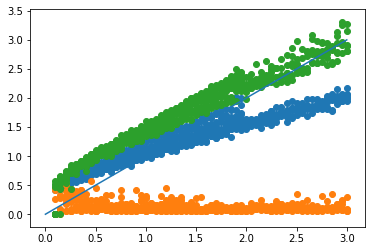

In [31]:
plt.plot(np.linspace(0,3), np.linspace(0,3))
plt.scatter(energy, mean_energy)
plt.scatter(energy, min_energy)
plt.scatter(energy, max_energy)

In [33]:
mean_theta = list(map(lambda x: x['theta'].mean(), result))

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


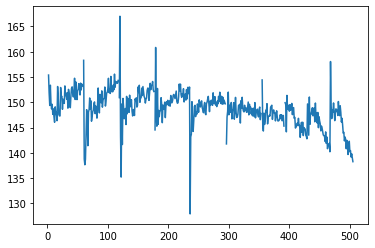

In [35]:
plt.plot(np.rad2deg(mean_theta))


In [17]:
def plot_energy(path, field=8e-4, heigth=0):
    theta, energy, result = load_reversed_energy(path, field, heigth)
    # min_energy = list(map(my_min, result))
    # max_energy = list(map(my_max, result))
    mean_energy = list(map(lambda x: x['energy'].mean(), result))
    plt.plot(np.linspace(0,3), np.linspace(0,3))
    plt.scatter(energy, mean_energy)
    # plt.scatter(energy, min_energy)
    # plt.scatter(energy, max_energy)
    plt.xlabel("Начальная энергия, МэВ")
    plt.ylabel("Энергия после разворота, МэВ")
    plt.title("Электрическое поле {} кВ/см".format(field*1e4))
    plt.tight_layout()
    plt.savefig("reverse_energy.png", dpi = 600)

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


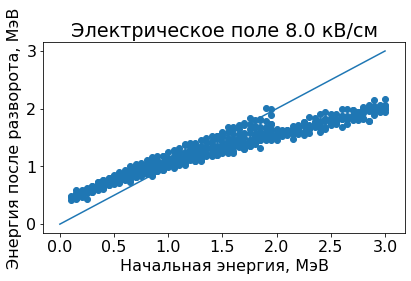

In [18]:
plot_energy(path)



/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


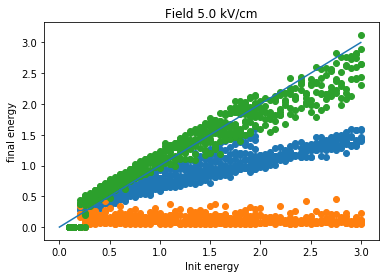

In [38]:
plot_energy(path, field=5e-4)